In [220]:
%pwd

In [359]:
%pwd

In [407]:
import os
import math
import arcpy

from glob import glob

In [408]:
def sort_utm_clockwise(utm_x, utm_y):
    """
    Sorts UTM coordinates clockwise.

    Args:
        utm_x: A list of UTM x-coordinates.
        utm_y: A list of UTM y-coordinates.

    Returns:
        A list of tuples, where each tuple is a (utm_x, utm_y) coordinate,
        sorted in clockwise order. Returns an empty list if input lists are empty.
    """
    if not utm_x or not utm_y or len(utm_x) != len(utm_y):
        return []  # Handle empty or invalid input

    coords = [(utm_x[i], utm_y[i]) for i in range(len(utm_x))]

    if len(coords) <= 2:
        return coords  # No need to sort if 2 or fewer points

    # 1. Calculate the centroid (center of mass) of the coordinates.
    center_x = sum(x for x, y in coords) / len(coords)
    center_y = sum(y for x, y in coords) / len(coords)

    # 2. Define a function to calculate the angle of each point relative to the centroid.
    def angle_to_centroid(coord):
        x, y = coord
        return math.atan2(y - center_y, x - center_x)

    # 3. Sort the coordinates based on their angles in descending order.
    #    Descending order for atan2 usually results in clockwise sorting.
    sorted_coords = sorted(coords, key=angle_to_centroid, reverse=True)

    return sorted_coords

# Function to clean feature class names (removes spaces and special characters)
def sanitize_fc_name(name):return "".join(c if c.isalnum() or c == "_" else "_" for c in name)  # Replace invalid characters with "_"

# Function to create ArcPy Polygon from cartas UTM data
def create_polygon(data, utm_spatial_ref):
    points = [
        arcpy.Point(data["XMin_utm"], data["YMin_utm"]),
        arcpy.Point(data["XMin_utm"], data["YMax_utm"]),
        arcpy.Point(data["XMax_utm"], data["YMax_utm"]),
        arcpy.Point(data["XMax_utm"], data["YMin_utm"]),
        arcpy.Point(data["XMin_utm"], data["YMin_utm"])  # Closing the polygon
    ]
    return arcpy.Polygon(arcpy.Array(points), utm_spatial_ref)  # Explicitly assign UTM 17S

In [409]:
shapes = glob("Mar*/*-x-* *0/*test*shp")
shapes

['O - test.shp',
 'L - test.shp']

In [363]:
cartas = json.load(open(glob("*ss.json")[0], "r", encoding="utf-8"))
# cartas

In [364]:
# Output geodatabase (modify as needed)
output_gdb = "coverage2.gdb"

# Ensure the geodatabase exists (create if needed)
if not arcpy.Exists(output_gdb):arcpy.CreateFileGDB_management("./", output_gdb)

arcpy.env.workspace = output_gdb

In [365]:
# Load each shapefile into the geodatabase
for shp in shapes:
    if os.path.exists(shp):  # Check if the shapefile exists
        shp_name = os.path.basename(shp).replace(".shp", "")
        clean_name = sanitize_fc_name(shp_name)  # Sanitize feature class name
        output_fc = os.path.join(output_gdb, clean_name)

        if not arcpy.Exists(output_fc):
            arcpy.CopyFeatures_management(shp, output_fc)
            print(f"Loaded: {shp} → {output_fc}")
        else:
            print(f"Feature Class already exists: {output_fc}")
    else:
        print(f"Shapefile not found: {shp}")

print("All shapefiles processed.")

Feature Class already exists: O___test
Feature Class already exists: L___test
All shapefiles processed.


In [366]:
# Save the project (optional)
aprx.save()

In [370]:
# List feature classes directly using arcpy.Walk()
feature_classes = []
for dirpath, dirnames, filenames in arcpy.da.Walk(output_gdb, datatype="FeatureClass"):
    for filename in filenames:feature_classes.append(os.path.join(dirpath, filename))

# Print the loaded feature classes
if feature_classes:
    print("Feature Classes Found:")
    for fc in feature_classes:print(f"- {fc}")
else:print("No feature classes found in the geodatabase.")

Feature Classes Found:
- coverage2.gdb\O___test
- coverage2.gdb\L___test


In [355]:
# Define UTM spatial reference (change EPSG code if needed)
utm_spatial_ref = arcpy.SpatialReference(32717)  # Modify for the correct UTM Zone
# utm_spatial_ref

In [373]:
# Create polygon geometries from `cartas`
cartas_polygons = [(i, create_polygon(item, utm_spatial_ref), item["name"]) for i, item in enumerate(cartas)]
cartas_polygons

[(0, <Polygon object at 0x1b4b123add0[0x1b4b1299b90]>, 'EL_ORO\\MVI_B4.tif'),
 (1, <Polygon object at 0x1b4b1238c50[0x1b4b1299f50]>, 'Manabi\\MIV_E4.tif'),
 (2,
  <Polygon object at 0x1b4b123b310[0x1b4b129a9a0]>,
  'GUAYAS Y SANTA ELENA\\MV_D2.tif'),
 (3,
  <Polygon object at 0x1b4af546c50[0x1b4b1298f30]>,
  'GUAYAS Y SANTA ELENA\\TENDALES.tif'),
 (4, <Polygon object at 0x1b4b123b490[0x1b4b129bbd0]>, 'Guayas\\MV_C2.tif'),
 (5,
  <Polygon object at 0x1b4b123b5d0[0x1b4b129ab80]>,
  'Esmeraldas\\NII_C1.tif'),
 (6, <Polygon object at 0x1b4b123b650[0x1b4b1299ad0]>, 'Manabi\\NII_C4.tif'),
 (7,
  <Polygon object at 0x1b4b123b6d0[0x1b4b1299c20]>,
  'Esmeraldas\\ÑII_E2.tif'),
 (8, <Polygon object at 0x1b4b123b510[0x1b4b129b6c0]>, 'LOS_RIOS\\NV_B4.tif'),
 (9, <Polygon object at 0x1b4b123b3d0[0x1b4b129b270]>, 'Manabi\\MIII_B4.tif'),
 (10,
  <Polygon object at 0x1b4b123b690[0x1b4b129ae80]>,
  'GUAYAS Y SANTA ELENA\\MANGLARITO.tif'),
 (11, <Polygon object at 0x1b4b123b850[0x1b4b129a5b0]>, 'Manabi\\

In [375]:
list(j[1][0])

[<Point (527561.2300433978, 9870668.98344941, #, #)>,
 <Point (527561.2300433978, 9889103.85081598, #, #)>,
 <Point (555391.0311714251, 9889103.85081598, #, #)>,
 <Point (555391.0311714251, 9870668.98344941, #, #)>,
 <Point (527561.2300433978, 9870668.98344941, #, #)>]

In [376]:
output_gdb

'coverage2.gdb'

In [377]:
fc_path

'./coverage2.gdb\\CM___test'

In [378]:
fc

'coverage2.gdb\\CENTENO_MANUEL___test'

In [379]:
# Dictionary to store results
shapefile_to_cartas_mapping = {}

# Analyze each feature class and check which `cartas` polygon it belongs to
for fc in feature_classes:
    fc_path = os.path.join("./", fc)  # Correct geodatabase path
    print(f"Processing: {fc_path}")

    if not arcpy.Exists(fc_path):
        print(f"WARNING: Feature class {fc} not found in geodatabase!")
        continue  # Skip if the feature class doesn't exist

    with arcpy.da.SearchCursor(fc_path, ["SHAPE@", "OID@"], spatial_reference=utm_spatial_ref) as cursor:
        for row in cursor:
            shapefile_polygon = row[0]  # Get the polygon geometry from the shapefile
            
            for index, cartas_polygon, cartas_name in cartas_polygons:
                # print()
                if cartas_polygon.overlaps(shapefile_polygon) or cartas_polygon.intersect(shapefile_polygon, 2):
                    shapefile_to_cartas_mapping[fc] = cartas_name
                    print(f"Shapefile '{fc}' belongs to '{cartas_name}'")
                    break  # Stop checking once we find a match
    print()

# Output results
if not shapefile_to_cartas_mapping:
    print("No shapefile polygons match any reference polygon.")

print("\nFinal Mapping:")
for shp, polygon_name in shapefile_to_cartas_mapping.items():
    print(f"- {shp} → {polygon_name}")

Processing: ./coverage2.gdb\CV___test

Processing: ./coverage2.gdb\CM___test

No shapefile polygons match any reference polygon.

Final Mapping:


In [340]:
list(shapefile_polygon.boundary()[0])

[<Point (555230.5, 9909468.0, #, #)>,
 <Point (555260.5999999996, 9909463.0, #, #)>,
 <Point (555266.2999999998, 9909462.1, #, #)>,
 <Point (555145.7999999998, 9909322.6, #, #)>,
 <Point (555112.7999999998, 9909329.7, #, #)>,
 <Point (555230.5, 9909468.0, #, #)>]

In [331]:
cartas_polygon.boundary()[0]

<Array [<Point (638836.9287414429, 10091756.23566901, #, #)>, <Point (638836.9287414429, 10110206.146517277, #, #)>, <Point (666676.7948991064, 10110206.146517277, #, #)>, <Point (666676.7948991064, 10091756.23566901, #, #)>, <Point (638836.9287414429, 10091756.23566901, #, #)>]>

In [316]:
dir(cartas_polygon)

['JSON',
 'WKB',
 'WKT',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__from_scripting_arc_object__',
 '__ge__',
 '__geo_interface__',
 '__getSVG__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__type_mapping__',
 '__type_string__',
 '__weakref__',
 '__xor__',
 '_arc_object',
 '_fromGeoJson',
 '_go',
 '_passthrough',
 '_repr_svg_',
 'angleAndDistanceTo',
 'area',
 'boundary',
 'buffer',
 'centroid',
 'clip',
 'contains',
 'convexHull',
 'crosses',
 'cut',
 'densify',
 'difference',
 'disjoint',
 'distanceTo',
 'equals',
 'extent',
 'firstPoint',
 'generalize',
 'getArea',
 'getGeohash',
 'getLength',
 'getPart',
 'hasCurves',
 'hullRectangle

In [374]:
for i in cartas_polygons:
    if "miv_a2" in i[2].lower():
        print(i)
        j = i

(36, <Polygon object at 0x1b498c38390[0x1b4b1299d10]>, 'Manabi\\MIV_A2.tif')


In [386]:
for i in cartas_polygons:
    if "miii_e2" in i[2].lower():
        print(i)
        j = i

(156, <Polygon object at 0x1b4b11dc490[0x1b4b1299410]>, 'Manabi\\MIII_E2.tif')


In [403]:
for i in list(j[1].boundary()[0]):
    print(i.X)

527560.7002536918
527560.7002536918
555390.5292634552
555390.5292634552
527560.7002536918


In [404]:
for i in list(j[1].boundary()[0]):
    print(i.Y)

9907532.267373245
9925967.153399017
9925967.153399017
9907532.267373245
9907532.267373245


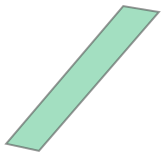

In [309]:
shapefile_polygon

In [308]:
cartas_polygon.overlaps(shapefile_polygon)

False

In [384]:
cartas_polygon.intersect(shapefile_polygon, 2)

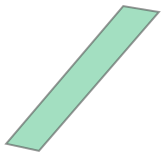

In [301]:
shapefile_polygon

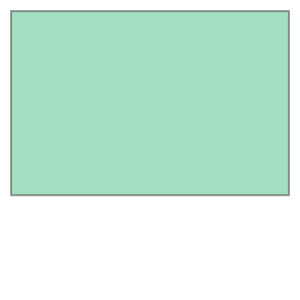

In [333]:
cartas_polygon